In [1]:
import module
import matplotlib.pyplot as plt
import numpy as np
    
#vgs
Vgs_start=-8
Vgs_stop=2
Vgs_step=0.05
Vgs_comp= 0.02
    
time='MED'
device = module.HP4155a('GPIB0::17::INSTR')
    
#setup device
device.reset()
device.measurement_mode('SWE')

device.disable_vsu(1)
device.disable_vsu(2)
device.disable_vmu(1)
device.disable_vmu(2)

#smu1 
device.smu_vname(1,'VS1')
device.smu_iname(1,'IS1')
device.smu_mode_meas(1,'COMM')
device.smu_function_sweep(1,'CONS')
    
#smu2
device.smu_disable_sweep(2)
    
#smu3
device.smu_vname(3,'VGS')
device.smu_iname(3,'IG')
device.smu_mode_meas(3,'V')
device.smu_function_sweep(3,'VAR1')
    
#smu4
device.smu_vname(4,'VS2')
device.smu_iname(4,'IS2')
device.smu_mode_meas(4,'COMM')
device.smu_function_sweep(4,'CONS')
    
#var1 setup
device.start_value_sweep(Vgs_start)
device.step_sweep(Vgs_step)
device.stop_value_sweep(Vgs_stop)
device.comp('VAR1',Vgs_comp)
device.integration_time(time)
    
#user functions
device.user_function('IGmm','mA/mm','1E4*IG')
device.user_function('ABSIGm','mA/mm','ABS(IGmm)')
    
#display
device.display_variable('X','VGS')
device.display_variable('Y1','IGmm')
device.display_variable('Y2','ABSIGm')
    
device.single_measurement()
while device.operation_completed() == False:
    pass
        
device.autoscaling()
#return data from the device

In [2]:
Vgs=device.return_data('VGS')
Igmm=device.return_data('IGmm')
absig=device.return_data('ABSIGm')


print(Vgs)
print(len(Vgs))
print(Igmm)
print(len(Igmm))
print(absig)
print(len(absig))

[-8.0, -7.95, -7.9, -7.85, -7.8, -7.75, -7.7, -7.65, -7.6, -7.55, -7.5, -7.45, -7.4, -7.35, -7.3, -7.25, -7.2, -7.15, -7.1, -7.05, -7.0, -6.95, -6.9, -6.85, -6.8, -6.75, -6.7, -6.65, -6.6, -6.55, -6.5, -6.45, -6.4, -6.35, -6.3, -6.25, -6.2, -6.15, -6.1, -6.05, -6.0, -5.95, -5.9, -5.85, -5.8, -5.75, -5.7, -5.65, -5.6, -5.55, -5.5, -5.45, -5.4, -5.35, -5.3, -5.25, -5.2, -5.15, -5.1, -5.05, -5.0, -4.95, -4.9, -4.85, -4.8, -4.75, -4.7, -4.65, -4.6, -4.55, -4.5, -4.45, -4.4, -4.35, -4.3, -4.25, -4.2, -4.15, -4.1, -4.05, -4.0, -3.95, -3.9, -3.85, -3.8, -3.75, -3.7, -3.65, -3.6, -3.55, -3.5, -3.45, -3.4, -3.35, -3.3, -3.25, -3.2, -3.15, -3.1, -3.05, -3.0, -2.95, -2.9, -2.85, -2.8, -2.75, -2.7, -2.65, -2.6, -2.55, -2.5, -2.45, -2.4, -2.35, -2.3, -2.25, -2.2, -2.15, -2.1, -2.05, -2.0, -1.95, -1.9, -1.85, -1.8, -1.75, -1.7, -1.65, -1.6, -1.55, -1.5, -1.45, -1.4, -1.35, -1.3, -1.25, -1.2, -1.15, -1.1, -1.05, -1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35

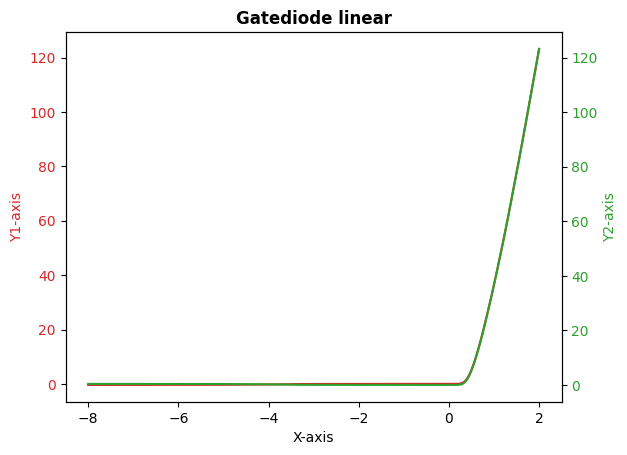

In [3]:
fig, ax1 = plt.subplots() 
 
color = 'tab:red'
ax1.set_xlabel('X-axis') 
ax1.set_ylabel('Y1-axis', color = color) 
ax1.plot(Vgs,Igmm, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
 
color = 'tab:green'
ax2.set_ylabel('Y2-axis', color = color) 
ax2.plot(Vgs,absig, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
 
# Adding title
plt.title('Gatediode linear', fontweight ="bold") 
 
# Show plot
plt.show()

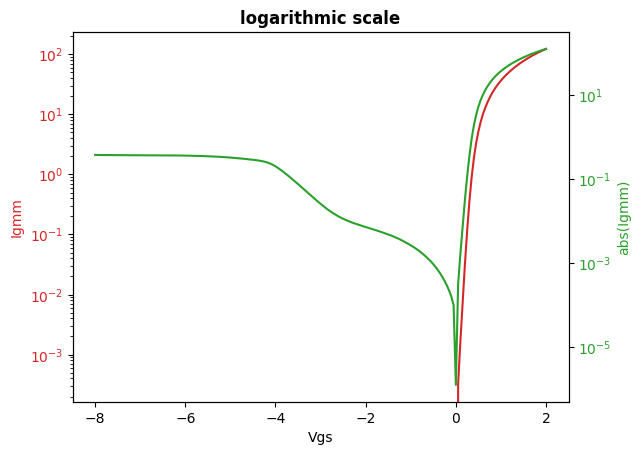

In [4]:
fig, ax1 = plt.subplots() 
 
color = 'tab:red'
ax1.set_xlabel('Vgs') 
ax1.set_ylabel('Igmm', color = color) 
ax1.set_yscale('log')
ax1.plot(Vgs,Igmm, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
 
color = 'tab:green'
ax2.set_ylabel('abs(Igmm)', color = color) 
ax2.set_yscale('log')
ax2.plot(Vgs,absig, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
 
# Adding title
plt.title('logarithmic scale', fontweight ="bold") 
# Show plot
plt.show()